# Eratosthenovo síto

In [4]:
# Python: Eratosthenovo síto pro nalezení všech prvočísel menších než nebo rovných nmax
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

# vrací integer numpy pole prvočísel od 2 do nmax včetně
@njit
def sieve_of_eratosthenes(nmax):
    a = np.full(nmax + 1, True)       # alokace dynamického pole bool prvků (zde: síto)
    a[0:2] = False                     # 0 a 1 nejsou prvočísla
    n = 2                              # první prvočíslo
    dvojcata = 0
    while n <= np.sqrt(nmax):          # průchod od 2 do sqrt(nmax)
        nn = n * n                     # nejbližší nevyškrtnutý násobek
        while nn <= nmax:              # vyškrtávání násobků
            a[nn] = False              # - všech
            nn += n                    # posun na další násobek
        # posun na další nevyškrtnutý prvek
        n += 1
        while n <= nmax and not a[n]:
            n += 1

    cnt = 0
    for i in range(nmax + 1):          # zjištění počtu nevyškrtnutých prvků
        if a[i]:
            cnt += 1
    result = np.zeros(cnt, dtype=np.int32)  # alokace výstupního pole prvočísel
    nprime = 0
    for i in range(nmax + 1):          # průchod sítem
        if a[i]:
            result[nprime] = i         # přenos prvočísel z indexů v sítu do výstupního pole
            nprime += 1
    for i in range(np.size(result)):
        if (result[i+1] - result[i]) == 2:
            dvojcata += 1
    return result, dvojcata

nmax = 1_000

In [5]:
prvocisla, dvojce = sieve_of_eratosthenes(nmax)

In [6]:
x = np.arange(1,nmax,1)
prvocisla = np.zeros(np.size(x))
dvojice = np.zeros(np.size(x))
for i in range(np.size(x)):
    res, twin = sieve_of_eratosthenes(x[i])   # res je pole prvočísel, twin je počet dvojčat
    prvocisla[i] = res.size                    # uložíme počet prvočísel ≤ x[i]
    dvojice[i] = twin                          # uložíme počet dvojčat ≤ x[i]

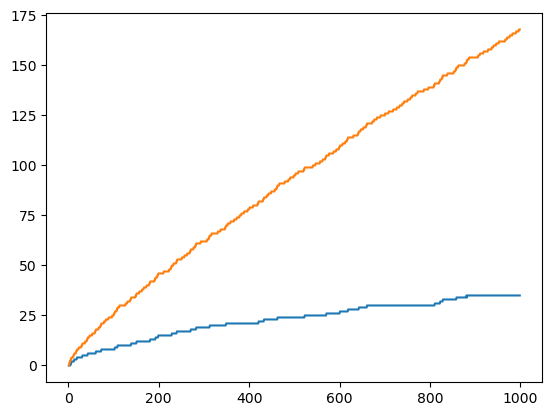

In [7]:
plt.plot(x,dvojice)
plt.plot(x,prvocisla)